In [60]:
import os
import random
import shutil
from pdf2image import convert_from_path
from pytesseract import image_to_string
from PIL import Image, ImageDraw, ImageFont
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from Levenshtein import distance as levenshtein_distance
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def ocr_udhr_pdfs(pdf_dir, output_dir, lang_map):
    """Perform OCR on UDHR PDFs."""
    os.makedirs(output_dir, exist_ok=True)

    for pdf_file in os.listdir(pdf_dir):
        if pdf_file.endswith(".pdf"):
            lang = pdf_file.split(".")[0]  # Extract language code
            if lang in lang_map:
                try:
                    images = convert_from_path(os.path.join(pdf_dir, pdf_file))
                    for i, img in enumerate(images):
                        page_text = image_to_string(img, lang=lang_map[lang]) + "\n"
                        with open(os.path.join(output_dir, f"{lang}_ocr_udhr.txt"), "a", encoding="utf-8") as f:
                            f.write(page_text)
                    print(f"OCR completed for {pdf_file}")
                except Exception as e:
                    print(f"Error processing {pdf_file}: {e}")
            else:
                print(f"Language {lang} not found in lang_map!")

In [17]:
pdf_dir = "./udhr_dataset/pdf/"
ocr_output_udhr_dir = "./ocr_udhr"
lang_map = {
    "ast": "ast", "ceb": "ceb", "ful": "ful", "lug": "lug", "isl": "isl", 
    "lin": "lin", "mri": "mri", "nya": "nya", "orm": "orm", "pol": "pol", 
    "por": "por", "ron": "ron", "sna": "sna", "slk": "slk", "slv": "slv",
    "som": "som", "swa": "swa", "swe": "swe", "tur": "tur", "umb": "umb", 
    "uzb": "uzb", "vie": "vie", "wol": "wol", "zul": "zul", "bel": "bel",
    "bul": "bul", "kaz": "kaz", "kir": "kir", "mkd": "mkd", "mon": "mon", 
    "rus": "rus", "srp": "srp", "tgk": "tgk", "ukr": "ukr", "ara": "ara", 
    "ckb": "ckb", "pus": "pus", "urd": "urd", "ben": "ben", "hin": "hin", 
    "mar": "mar", "npi": "nep", "guj": "guj", "pan": "pan", "mal": "mal", 
    "tam": "tam", "kan": "kan", "tel": "tel", "khm": "khm", "lao": "lao", 
    "mya": "mya", "tha": "tha", "jpn": "jpn", "kor": "kor", "zhs": "chi_sim", 
    "heb": "heb", "ell": "ell", "kat": "kat", "amh": "amh", "hye": "hye", "eng": "eng",
}
ocr_udhr_pdfs(pdf_dir, ocr_output_udhr_dir, lang_map)

Language pql not found in lang_map!
Language bng not found in lang_map!
Language src5 not found in lang_map!
Language fum1 not found in lang_map!
Error processing wol.pdf: (1, 'Error opening data file /opt/homebrew/share/tessdata/wol.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'wol\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')
Language lub not found in lang_map!
Language tru1 not found in lang_map!
Language kph not found in lang_map!
Language tsw not found in lang_map!
Language hat not found in lang_map!
Language ojb not found in lang_map!
Language fal not found in lang_map!
Language koo1 not found in lang_map!
Language mex not found in lang_map!
Language thj not found in lang_map!
Language cic not found in lang_map!
OCR completed for mkd.pdf
Language iii not found in lang_map!
Language bzc not found in lang_map!
Language ger not found in lang_map!
Language rrt not foun

In [35]:
def generate_flores_pdfs_from_txt(dev_dir, pdf_dir):
    """Generate PDFs from Flores .txt files."""
    os.makedirs(pdf_dir, exist_ok=True)

    for file in os.listdir(dev_dir):
        if file.endswith(".devtest"):  # Only process .dev files
            lang = file.split("_")[0]  # Extract language code
            txt_file_path = os.path.join(dev_dir, file)
            
            # Read text from the .dev file
            with open(txt_file_path, "r", encoding="utf-8") as f:
                text = f.read()

            # Create PDF from text
            pdf_path = os.path.join(pdf_dir, f"{lang}_flores.pdf")
            c = canvas.Canvas(pdf_path, pagesize=letter)

            # Set up font and size
            c.setFont("Helvetica", 10)
            width, height = letter

            # Write the text into the PDF, wrapping it if necessary
            y_position = height - 40  # Start from top of page
            line_height = 12  # Space between lines

            for line in text.splitlines():
                c.drawString(40, y_position, line)
                y_position -= line_height

                # Create a new page if the text overflows
                if y_position < 40:
                    c.showPage()
                    c.setFont("Helvetica", 10)
                    y_position = height - 40

            c.save()
            print(f"Generated PDF for {lang}")

In [33]:
def ocr_flores_pdfs(pdf_dir, output_dir, lang_map):
    """Perform OCR on UDHR PDFs."""
    os.makedirs(output_dir, exist_ok=True)

    for pdf_file in os.listdir(pdf_dir):
        if pdf_file.endswith(".pdf"):
            lang = pdf_file.split("_")[0]  # Extract language code
            if lang in lang_map:
                try:
                    images = convert_from_path(os.path.join(pdf_dir, pdf_file))
                    for i, img in enumerate(images):
                        page_text = image_to_string(img, lang=lang_map[lang]) + "\n"
                        with open(os.path.join(output_dir, f"{lang}_ocr_udhr.txt"), "a", encoding="utf-8") as f:
                            f.write(page_text)
                    print(f"OCR completed for {pdf_file}")
                except Exception as e:
                    print(f"Error processing {pdf_file}: {e}")
            else:
                print(f"Language {lang} not found in lang_map!")

In [37]:
flores_dev_dir = "./flores200_dataset/devtest/"
flores_pdf_dir = "./flores_pdfs"

# Generate PDFs from Flores .dev files
generate_flores_pdfs_from_txt(flores_dev_dir, flores_pdf_dir)
ocr_flores_pdfs(flores_pdf_dir, "./ocr_flores", lang_map)

Generated PDF for knc
Generated PDF for mni
Generated PDF for arb
Generated PDF for srp
Generated PDF for gaz
Generated PDF for sag
Generated PDF for mag
Generated PDF for srd
Generated PDF for lus
Generated PDF for fon
Generated PDF for ory
Generated PDF for mya
Generated PDF for epo
Generated PDF for ilo
Generated PDF for dan
Generated PDF for shn
Generated PDF for sin
Generated PDF for som
Generated PDF for tat
Generated PDF for fij
Generated PDF for ace
Generated PDF for khm
Generated PDF for slk
Generated PDF for arz
Generated PDF for kaz
Generated PDF for kas
Generated PDF for hne
Generated PDF for kbp
Generated PDF for eng
Generated PDF for zho
Generated PDF for asm
Generated PDF for vie
Generated PDF for ban
Generated PDF for fra
Generated PDF for kir
Generated PDF for bod
Generated PDF for sot
Generated PDF for eus
Generated PDF for lvs
Generated PDF for prs
Generated PDF for smo
Generated PDF for war
Generated PDF for ajp
Generated PDF for san
Generated PDF for hye
Generated 

In [57]:
def inject_ocr_errors(text, error_rate=0.1):
    """Inject OCR errors (deletions, insertions, substitutions) into text."""
    chars = list(text)
    total_chars = len(chars)
    num_errors = int(total_chars * error_rate)

    for _ in range(num_errors):
        # Ensure the index is within bounds
        action = random.choice(['delete', 'insert', 'replace'])
        if not chars:
            break  # No characters left to modify

        idx = random.randint(0, len(chars) - 1)

        if action == 'delete' and len(chars) > 1:
            # Delete a random character
            del chars[idx]
        elif action == 'insert':
            # Insert a random character
            chars.insert(idx, random.choice('abcdefghijklmnopqrstuvwxyz'))
        elif action == 'replace':
            # Replace a random character with another random character
            chars[idx] = random.choice('abcdefghijklmnopqrstuvwxyz')

    return ''.join(chars)

In [58]:
def generate_augmented_flores_pdfs_from_txt(dev_dir, pdf_dir, error_rate=0.1):
    """Generate augmented PDFs from Flores .txt files with OCR errors."""
    os.makedirs(pdf_dir, exist_ok=True)

    for file in os.listdir(dev_dir):
        if file.endswith(".devtest"):  # Process .devtest files
            lang = file.split("_")[0]  # Extract language code
            txt_file_path = os.path.join(dev_dir, file)
            
            # Read the text from the .devtest file
            with open(txt_file_path, "r", encoding="utf-8") as f:
                text = f.read()

            # Augment the text by injecting OCR-like errors
            augmented_text = inject_ocr_errors(text, error_rate)

            # Create PDF from augmented text
            pdf_path = os.path.join(pdf_dir, f"{lang}_augmented_flores.pdf")
            c = canvas.Canvas(pdf_path, pagesize=letter)

            # Set up font and size
            c.setFont("Helvetica", 10)
            width, height = letter

            # Write the augmented text into the PDF
            y_position = height - 40  # Start from top of page
            line_height = 12  # Space between lines

            for line in augmented_text.splitlines():
                c.drawString(40, y_position, line)
                y_position -= line_height

                # Create a new page if the text overflows
                if y_position < 40:
                    c.showPage()
                    c.setFont("Helvetica", 10)
                    y_position = height - 40

            c.save()
            print(f"Generated augmented PDF for {lang}")

# Example of how to generate augmented PDFs
flores_dev_dir = "./flores200_dataset/devtest/"
augmented_flores_pdf_dir = "./augmented_flores_pdfs"

generate_augmented_flores_pdfs_from_txt(flores_dev_dir, augmented_flores_pdf_dir, error_rate=0.15)

Generated augmented PDF for knc
Generated augmented PDF for mni
Generated augmented PDF for arb
Generated augmented PDF for srp
Generated augmented PDF for gaz
Generated augmented PDF for sag
Generated augmented PDF for mag
Generated augmented PDF for srd
Generated augmented PDF for lus
Generated augmented PDF for fon
Generated augmented PDF for ory
Generated augmented PDF for mya
Generated augmented PDF for epo
Generated augmented PDF for ilo
Generated augmented PDF for dan
Generated augmented PDF for shn
Generated augmented PDF for sin
Generated augmented PDF for som
Generated augmented PDF for tat
Generated augmented PDF for fij
Generated augmented PDF for ace
Generated augmented PDF for khm
Generated augmented PDF for slk
Generated augmented PDF for arz
Generated augmented PDF for kaz
Generated augmented PDF for kas
Generated augmented PDF for hne
Generated augmented PDF for kbp
Generated augmented PDF for eng
Generated augmented PDF for zho
Generated augmented PDF for asm
Generate

In [59]:
def ocr_augmented_flores_pdfs(pdf_dir, output_dir, lang_map):
    """Perform OCR on UDHR PDFs."""
    os.makedirs(output_dir, exist_ok=True)

    for pdf_file in os.listdir(pdf_dir):
        if pdf_file.endswith(".pdf"):
            lang = pdf_file.split("_")[0]  # Extract language code
            if lang in lang_map:
                try:
                    images = convert_from_path(os.path.join(pdf_dir, pdf_file))
                    for i, img in enumerate(images):
                        page_text = image_to_string(img, lang=lang_map[lang]) + "\n"
                        with open(os.path.join(output_dir, f"{lang}_ocr_aug_flores.txt"), "a", encoding="utf-8") as f:
                            f.write(page_text)
                    print(f"OCR completed for {pdf_file}")
                except Exception as e:
                    print(f"Error processing {pdf_file}: {e}")
            else:
                print(f"Language {lang} not found in lang_map!")
ocr_augmented_flores_pdfs("./augmented_flores_pdfs", "./ocr_augmented_flores", lang_map)

Language bem not found in lang_map!
Language bjn not found in lang_map!
Language bos not found in lang_map!
Language nld not found in lang_map!
Language crh not found in lang_map!
OCR completed for tur_augmented_flores.pdf
Language ajp not found in lang_map!
Error processing ckb_augmented_flores.pdf: (1, 'Error opening data file /opt/homebrew/share/tessdata/ckb.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'ckb\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')
Language khk not found in lang_map!
Language luo not found in lang_map!
Language uzn not found in lang_map!
Language hne not found in lang_map!
OCR completed for urd_augmented_flores.pdf
OCR completed for heb_augmented_flores.pdf
OCR completed for kir_augmented_flores.pdf
Language mag not found in lang_map!
Language ewe not found in lang_map!
Error processing zul_augmented_flores.pdf: (1, 'Error opening data file /opt/h

In [93]:
def calculate_cer(ground_truth, ocr_text):
    """Calculate Character Error Rate (CER)."""
    cer =( levenshtein_distance(ground_truth, ocr_text) / len(ground_truth))
    return cer

In [45]:
def evaluate_cer(ocr_dir, ground_truth_dir, lang_map, dataset_name="Dataset"):
    """Evaluate OCR performance for the provided dataset."""
    results = []
    for lang in lang_map:
        ocr_file = os.path.join(ocr_dir, f"{lang}_ocr_{dataset_name}.txt")
        ground_truth_file = os.path.join(ground_truth_dir, f"{lang}_ground_truth.txt")
        
        if os.path.exists(ocr_file) and os.path.exists(ground_truth_file):
            with open(ground_truth_file, "r", encoding="utf-8") as gt, open(ocr_file, "r", encoding="utf-8") as ocr:
                ground_truth = gt.read().strip()
                ocr_text = ocr.read().strip()
                cer = calculate_cer(ground_truth, ocr_text)
                results.append({"Language": lang, "CER": cer})
                print(f"{dataset_name} - {lang}: CER={cer:.2%}")
        else:
            print(f"Missing files for {lang}")
    return results

In [62]:
def combine_results(udhr_results, flores_results, augmented_flores_results):
    """Combine CER results for UDHR, Flores, and Augmented Flores into a single list."""
    combined_results = []

    # Create dictionaries for UDHR and Flores CER results (language -> CER)
    udhr_dict = {result['Language']: result['CER'] for result in udhr_results}
    flores_dict = {result['Language']: result['CER'] for result in flores_results}
    augmented_dict = {result['Language']: result['CER'] for result in augmented_flores_results}
    
    # Combine results for each language
    all_languages = set(udhr_dict.keys()).union(set(flores_dict.keys()), set(augmented_dict.keys()))
    
    for lang in all_languages:
        udhr_cer = udhr_dict.get(lang, "Not Available")
        flores_cer = flores_dict.get(lang, "Not Available")
        augmented_cer = augmented_dict.get(lang, "Not Available")
        
        combined_results.append({
            "Language": lang,
            "CER for UDHR": udhr_cer,
            "CER for Flores": flores_cer,
            "CER for Augmented Flores": augmented_cer
        })
    
    return combined_results

In [63]:
def save_results_to_csv(results, filename):
    """Save the combined results to a CSV file."""
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

In [94]:
udhr_results = evaluate_cer("./ocr_udhr", "./ground_truths", lang_map, dataset_name="udhr")
flores_results = evaluate_cer("./ocr_flores", "./ground_truths", lang_map, dataset_name="flores")
augmented_flores_results = evaluate_cer("./ocr_augmented_flores", "./ground_truths", lang_map, dataset_name="aug_flores")

Missing files for ast
udhr - ceb: CER=86.03%
Missing files for ful
Missing files for lug
Missing files for isl
Missing files for lin
Missing files for mri
Missing files for nya
Missing files for orm
Missing files for pol
udhr - por: CER=86.51%
Missing files for ron
Missing files for sna
Missing files for slk
udhr - slv: CER=86.88%
Missing files for som
Missing files for swa
Missing files for swe
Missing files for tur
Missing files for umb
Missing files for uzb
udhr - vie: CER=88.06%
Missing files for wol
Missing files for zul
Missing files for bel
Missing files for bul
udhr - kaz: CER=87.34%
Missing files for kir
udhr - mkd: CER=93.98%
Missing files for mon
udhr - rus: CER=87.17%
Missing files for srp
Missing files for tgk
udhr - ukr: CER=87.09%
Missing files for ara
Missing files for ckb
Missing files for pus
udhr - urd: CER=92.32%
Missing files for ben
Missing files for hin
Missing files for mar
Missing files for npi
Missing files for guj
Missing files for pan
Missing files for mal
M

In [71]:
combined_results = combine_results(udhr_results, flores_results, augmented_flores_results)
save_results_to_csv(combined_results, "ocr_comparison_results.csv")

Results saved to ocr_comparison_results.csv


In [86]:
df = pd.read_csv("ocr_comparison_results.csv")
# Convert the CER columns to numeric, forcing errors to NaN
df['CER for UDHR'] = pd.to_numeric(df['CER for UDHR'], errors='coerce')*100
df['CER for Flores'] = pd.to_numeric(df['CER for Flores'], errors='coerce')*100
df['CER for Augmented Flores'] = pd.to_numeric(df['CER for Augmented Flores'], errors='coerce')*100
df.head()

,Language,CER for UDHR,CER for Flores,CER for Augmented Flores
0,kor,NaN,97.848673,97.411221
1,mri,NaN,69.536319,70.663435
2,eng,92.086536,75.410888,75.106585
3,slk,NaN,78.979736,78.390669
4,hye,NaN,99.588861,99.676352


Average CER for UDHR: 89.3
Average CER for Flores: 88.8
Average CER for Augmented Flores: 89.6


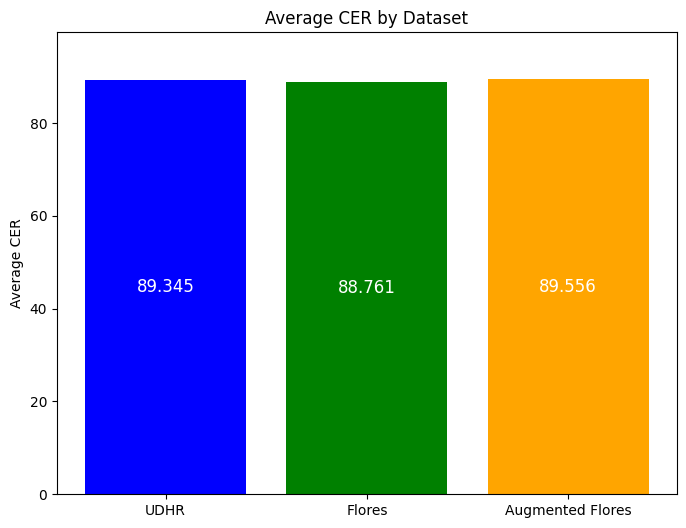

In [90]:
# Drop rows that contain NaN in any column
df_cleaned = df.dropna()

# Calculate the average CER for each dataset
avg_cer_udhr = df_cleaned['CER for UDHR'].mean()
avg_cer_flores = df_cleaned['CER for Flores'].mean()
avg_cer_augmented = df_cleaned['CER for Augmented Flores'].mean()
print(f"Average CER for UDHR: {avg_cer_udhr:.3}")
print(f"Average CER for Flores: {avg_cer_flores:.3}")
print(f"Average CER for Augmented Flores: {avg_cer_augmented:.3}")

# Prepare data for plotting
datasets = ['UDHR', 'Flores', 'Augmented Flores']
average_cers = [avg_cer_udhr, avg_cer_flores, avg_cer_augmented]

# Plot the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(datasets, average_cers, color=['blue', 'green', 'orange'])

# Add labels and title
plt.ylabel('Average CER')
plt.title('Average CER by Dataset')
plt.ylim(0, max(average_cers) + 10)  # Add some space on top

for bar in bars:
    height = bar.get_height()
    # Place the text inside the bar (slightly lower than the top of the bar)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.3f}', 
             ha='center', va='center', fontsize=12, color='white')

# Display the plot
plt.show()

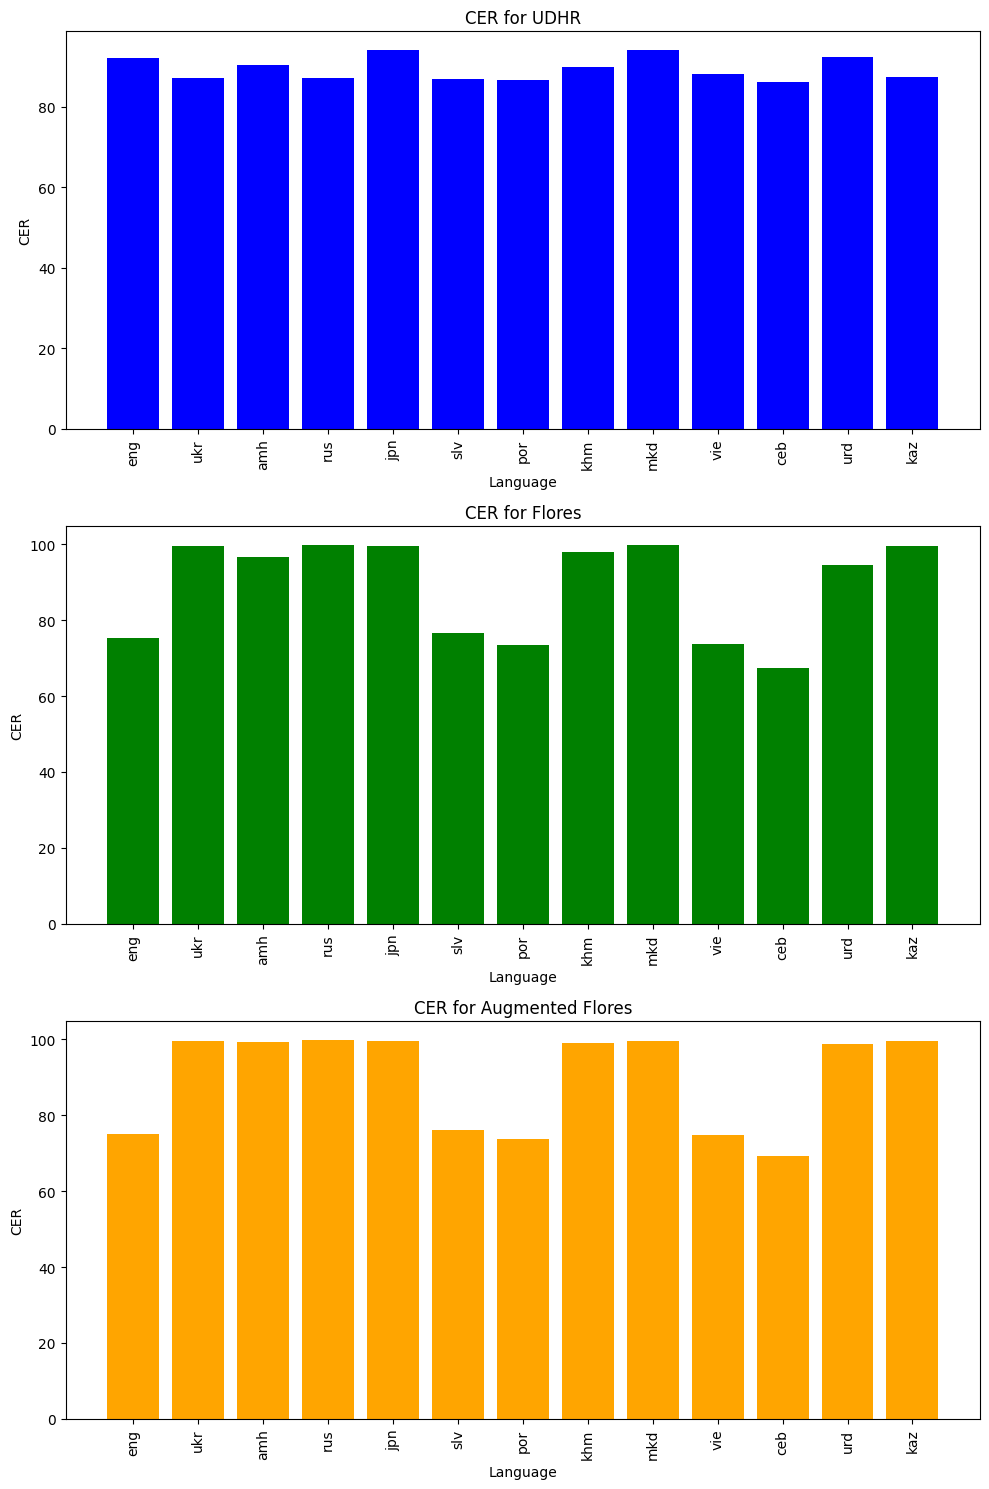

In [95]:
# Step 2: Create a plot for each dataset
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Three rows, one for each dataset

# Plot CER for UDHR dataset
axes[0].bar(df_cleaned['Language'], df_cleaned['CER for UDHR'], color='blue')
axes[0].set_title('CER for UDHR')
axes[0].set_xlabel('Language')
axes[0].set_ylabel('CER')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Plot CER for Flores dataset
axes[1].bar(df_cleaned['Language'], df_cleaned['CER for Flores'], color='green')
axes[1].set_title('CER for Flores')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('CER')
axes[1].tick_params(axis='x', rotation=90)

# Plot CER for Augmented Flores dataset
axes[2].bar(df_cleaned['Language'], df_cleaned['CER for Augmented Flores'], color='orange')
axes[2].set_title('CER for Augmented Flores')
axes[2].set_xlabel('Language')
axes[2].set_ylabel('CER')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [98]:
# Function to categorize CER values
def categorize_cer(cer_value):
    if cer_value < 0.02:
        return 'Good'
    elif cer_value <= 0.10:
        return 'Average'
    else:
        return 'Poor'

# Apply the categorization function to the CER columns
df['Category for UDHR'] = df['CER for UDHR'].apply(categorize_cer)
df['Category for Flores'] = df['CER for Flores'].apply(categorize_cer)
df['Category for Augmented Flores'] = df['CER for Augmented Flores'].apply(categorize_cer)

# Calculate the percentage of languages in each category for each dataset
categories = ['Good', 'Average', 'Poor']
category_percentages = {}

for category in categories:
    # UDHR percentages
    udhr_count = (df['Category for UDHR'] == category).sum()
    udhr_percentage = (udhr_count / len(df)) * 100

    # Flores percentages
    flores_count = (df['Category for Flores'] == category).sum()
    flores_percentage = (flores_count / len(df)) * 100

    # Augmented Flores percentages
    augmented_count = (df['Category for Augmented Flores'] == category).sum()
    augmented_percentage = (augmented_count / len(df)) * 100

    category_percentages[category] = [udhr_percentage, flores_percentage, augmented_percentage]

# Create the final DataFrame for the table
category_table = pd.DataFrame(category_percentages, index=['UDHR', 'Flores', 'Augmented Flores']).transpose()

# Display the table
print(category_table)


          UDHR  Flores  Augmented Flores
Good       0.0     0.0               0.0
Average    0.0     0.0               0.0
Poor     100.0   100.0             100.0
